In [ ]:
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.io import imread
from skimage.exposure import cumulative_distribution
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma
from skimage.measure import compare_psnr
from skimage.util import random_noise
from skimage.color import rgb2gray
from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage, misc
import matplotlib.pylab as pylab

In [ ]:
im = Image.open("AmazonParrot.jpg")

In [ ]:
im.show()

In [ ]:
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks

def plot_hist(r, g, b, title=''):
    r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
    pylab.hist(np.array(g).ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
    pylab.hist(np.array(b).ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
    pylab.xlabel('pixel value', size=20), pylab.ylabel('frequency', size=20)
    pylab.title(title, size=20)

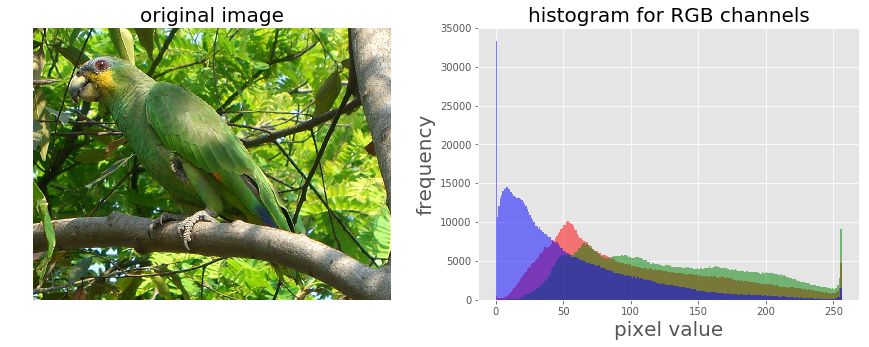

In [ ]:
im_r, im_g, im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121), plot_image(im, 'original image')
pylab.subplot(122), plot_hist(im_r, im_g, im_b,'histogram for RGB channels')
pylab.show()

In [ ]:
### Contrast is a measure of the “range” of an image; i.e.
##how spread its intensities are.

### low-contrast image since the color channel histograms are concentrated
### at a certain range of values (right-skewed)
### not spread over all possible pixel values

### Contrast streching:  is all about increasing the difference between the maximum intensity value in an image and the minimum one. All the rest of the intensity values are spread out between this range

In [ ]:
multiBands = im.split()

#### contrast streching formulae

##### Io = (Ii-Mini)*(((Maxo-Mino)/(Maxi-Mini))+Mino)



Io                                - Output pixel value

Ii                                 - Input pixel value

Mini                         - Minimum pixel value in the input image

Maxi                        - Maximum pixel value in the input image

Mino                        - Minimum pixel value in the output image

Maxo                       - Maximum pixel value in the output image

In [ ]:
# Method to process the red band of the image

def normalizeRed(intensity):

    iI      = intensity



    minI    = 0

    maxI    = 120



    minO    = 0

    maxO    = 255



    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)

    return iO

In [ ]:
def normalizeGreen(intensity):

    iI      = intensity



    minI    = 10

    maxI    = 250



    minO    = 0

    maxO    = 255



    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)

    return iO

In [ ]:
def normalizeBlue(intensity):

    iI      = intensity



    minI    = 0

    maxI    = 180



    minO    = 0

    maxO    = 255



    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)

    return iO

In [ ]:
# Apply point operations that does contrast stretching on each color band

normalizedRedBand      = multiBands[0].point(normalizeRed)

normalizedGreenBand    = multiBands[1].point(normalizeGreen)

normalizedBlueBand     = multiBands[2].point(normalizeBlue)

In [ ]:
# Create a new image from the contrast stretched red, green and blue brands

normalizedImage = Image.merge("RGB", (normalizedRedBand, normalizedGreenBand, normalizedBlueBand))

In [ ]:
# Display the image after contrast stretching

normalizedImage.show()